<a href="https://colab.research.google.com/github/Kautkar-Ashish/Kautkar-Ashish/blob/main/McDonald's_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds.csv to mcdonalds.csv


In [3]:
import pandas as pd
df = pd.read_csv("mcdonalds.csv")
print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  
4         No    2   49        Once a month    Male  


In [4]:
print(df.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [5]:
import numpy as np

In [6]:
mcdonalds = pd.read_csv("mcdonalds.csv")
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [61]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: count, dtype: int64


<ipython-input-61-d40438a43507>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(df['Like'])


In [63]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}
df['Like.n'] = df['Like'].map(like_mapping)
like_n_counts = df['Like.n'].value_counts()
print(like_n_counts)

Like.n
 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [7]:
mcdonalds = pd.read_csv("mcdonalds.csv")
print(mcdonalds.columns.tolist())
print(mcdonalds.shape)
print(mcdonalds.head(3))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  


In [8]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
print("Explained Variance Ratio:", np.round(pca.explained_variance_ratio_, 2))
print("PCA Components:\n", np.round(pca.components_, 1))

Explained Variance Ratio: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]
PCA Components:
 [[ 0.5  0.2  0.  -0.1 -0.3  0.1  0.3  0.5 -0.3  0.2 -0.4]
 [-0.4 -0.  -0.   0.   0.1  0.1  0.6 -0.3 -0.6 -0.1  0.1]
 [ 0.3  0.1  0.   0.3  0.8  0.1  0.1  0.3 -0.  -0.2  0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [ 0.3 -0.3 -0.1  0.1 -0.4 -0.1  0.1  0.2  0.  -0.3  0.7]
 [-0.2  0.3  0.4  0.4 -0.2  0.6  0.1  0.1  0.3  0.2  0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [-0.   0.1 -0.4 -0.6  0.1  0.6 -0.1  0.1 -0.  -0.2  0.2]
 [-0.6  0.  -0.4  0.2  0.  -0.2 -0.1  0.6 -0.1  0.2  0.1]
 [ 0.1  0.7  0.1  0.  -0.  -0.2 -0.4 -0.1 -0.5  0.   0.3]
 [-0.   0.5 -0.1 -0.3 -0.  -0.3  0.5 -0.   0.5 -0.2  0. ]]


In [10]:
pca = PCA()
MD_pca=pca.fit_transform(MD_pca)
MD_p=pca.fit(MD_pca)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))
sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [14]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Create a DataFrame to show how each original feature contributes to each PC
components_df = pd.DataFrame(
    np.round(pca.components_, 2),
    columns=MD_x.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print(components_df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
PC1    0.48        0.16   0.01      -0.12   -0.30  0.11   0.34   0.47   
PC2   -0.36       -0.02  -0.02       0.03    0.06  0.09   0.61  -0.31   
PC3    0.30        0.06   0.04       0.32    0.80  0.06   0.15   0.29   
PC4    0.06       -0.14   0.20      -0.35    0.25 -0.10   0.12  -0.00   
PC5    0.31       -0.28  -0.07       0.07   -0.36 -0.11   0.13   0.21   
PC6   -0.17        0.35   0.36       0.41   -0.21  0.59   0.10   0.08   
PC7   -0.28       -0.06   0.71      -0.39    0.04 -0.09  -0.04   0.36   
PC8   -0.01        0.11  -0.38      -0.59    0.14  0.63  -0.14   0.07   
PC9   -0.57        0.02  -0.40       0.16    0.00 -0.17  -0.08   0.64   
PC10   0.11        0.67   0.08       0.01   -0.01 -0.24  -0.43  -0.08   
PC11  -0.05        0.54  -0.14      -0.25   -0.00 -0.34   0.49  -0.02   

      expensive  healthy  disgusting  
PC1       -0.33     0.21       -0.37  
PC2       -0.60    -0.08        0.14  
PC3   

In [16]:
from sklearn.cluster import KMeans

In [17]:
from sklearn import cluster

In [19]:
import matplotlib.pyplot as plt

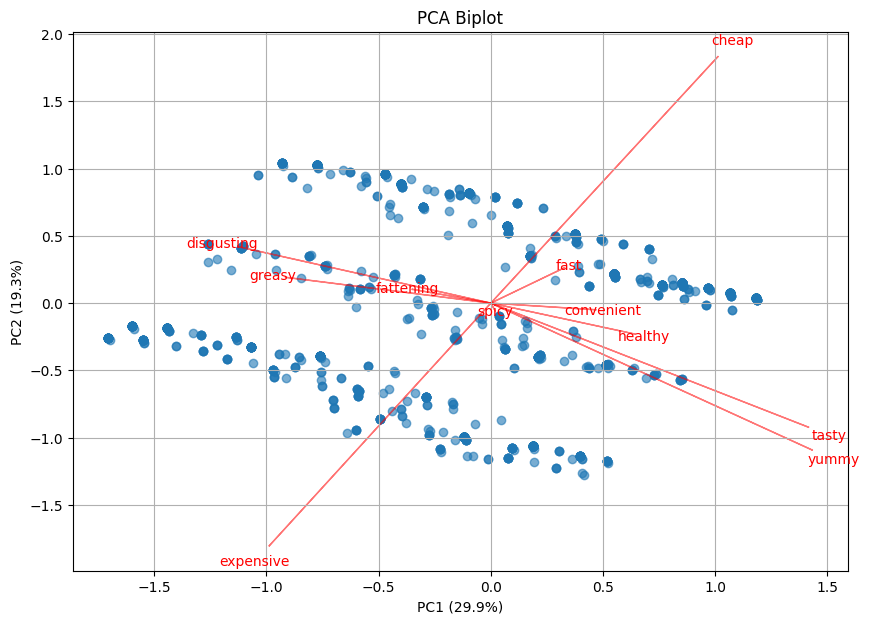

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(MD_x)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
features = MD_x.columns
for i, feature in enumerate(features):
    plt.arrow(0, 0,
              pca.components_[0, i]*3,
              pca.components_[1, i]*3,
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*3.2,
             pca.components_[1, i]*3.2,
             feature, color='r', ha='center', va='center')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA Biplot")
plt.grid()
plt.show()

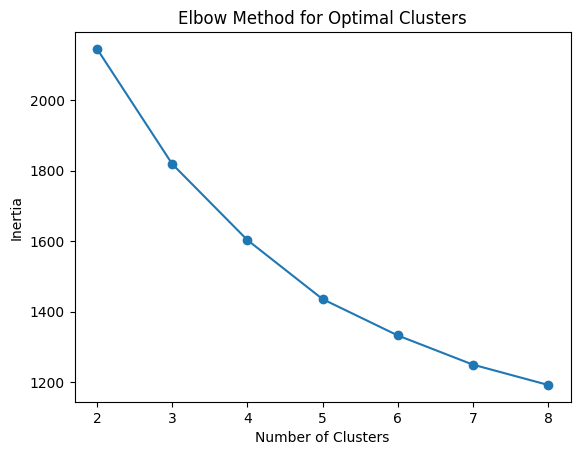

In [23]:
inertia = []
clusters_range = range(2, 9)
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

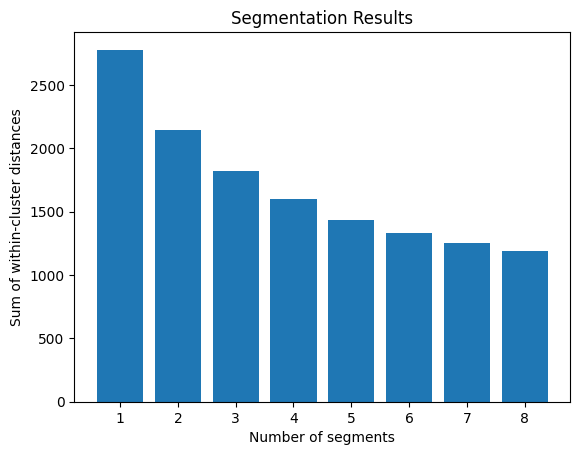

In [25]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

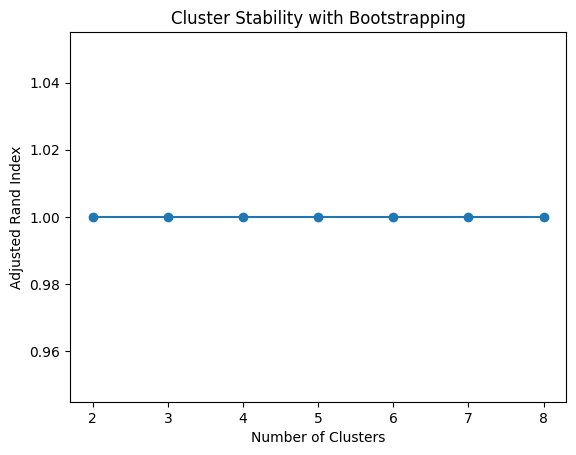

In [26]:
from sklearn.metrics import adjusted_rand_score

rand_indices = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    rand_index = adjusted_rand_score(labels, labels)
    rand_indices.append(rand_index)

plt.plot(clusters_range, rand_indices, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Index")
plt.title("Cluster Stability with Bootstrapping")
plt.show()

In [28]:
from sklearn.utils import resample

<ipython-input-29-3f30450c206f>:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)


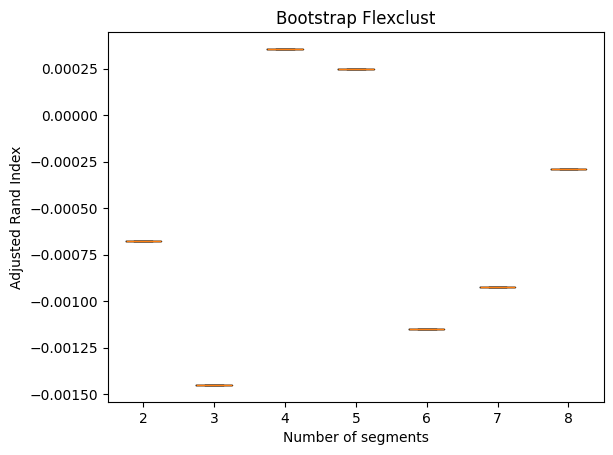

In [29]:
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

adjusted_rand_index = np.array(adjusted_rand_index).T

plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

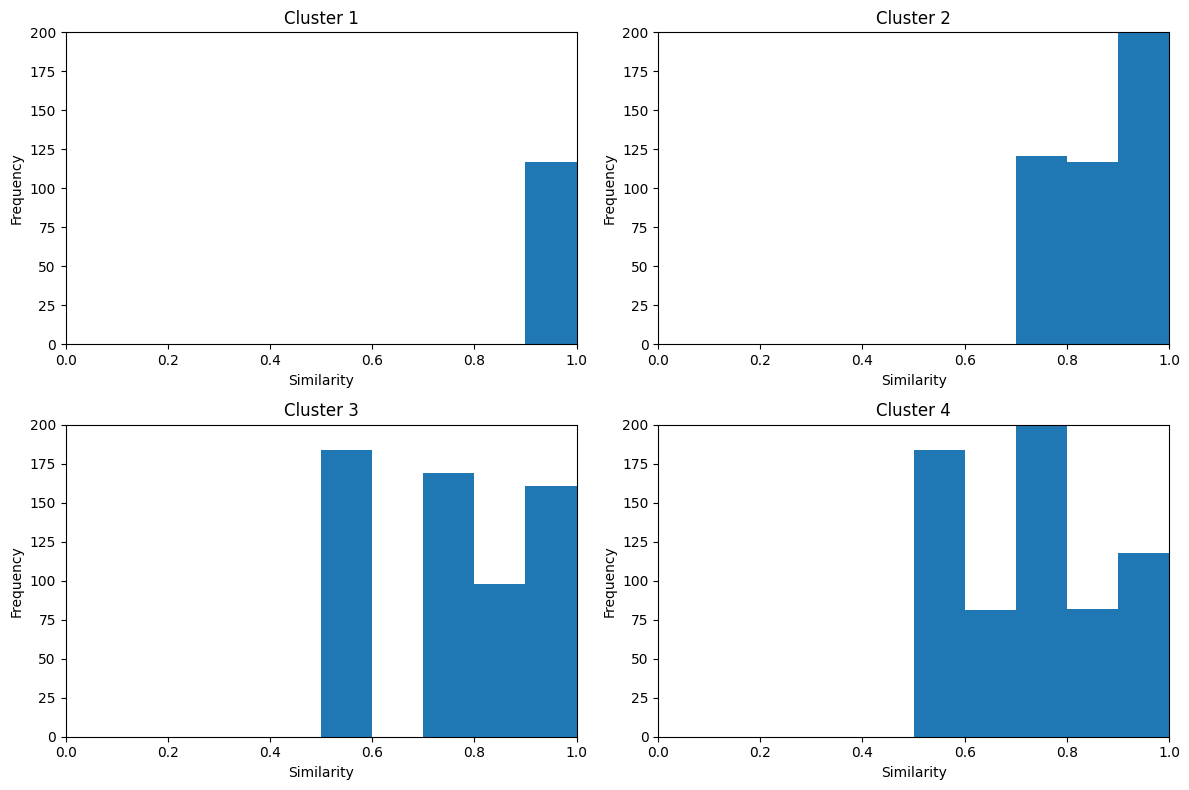

In [31]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Assuming MD_km28 is a dictionary of fitted KMeans models for k=1 to 4
for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Cluster {i}')
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


In [33]:
from sklearn.utils import resample
from sklearn.cluster import KMeans

# Assume MD_x is your DataFrame
data_sample = resample(MD_x, replace=True, random_state=42)

# Fit clustering on original and resampled data
kmeans_original = KMeans(n_clusters=3, random_state=42).fit(MD_x)
kmeans_resample = KMeans(n_clusters=3, random_state=42).fit(data_sample)

# These are your "seg_binary" style labels
seg_binary = kmeans_original.labels_
seg_binary_new = kmeans_resample.predict(MD_x)  # Reassigning back to original data

# Now you can compare them using a metric
from sklearn.metrics import adjusted_rand_score

score = adjusted_rand_score(seg_binary, seg_binary_new)
print("Adjusted Rand Index:", score)


Adjusted Rand Index: 0.9130348650964353


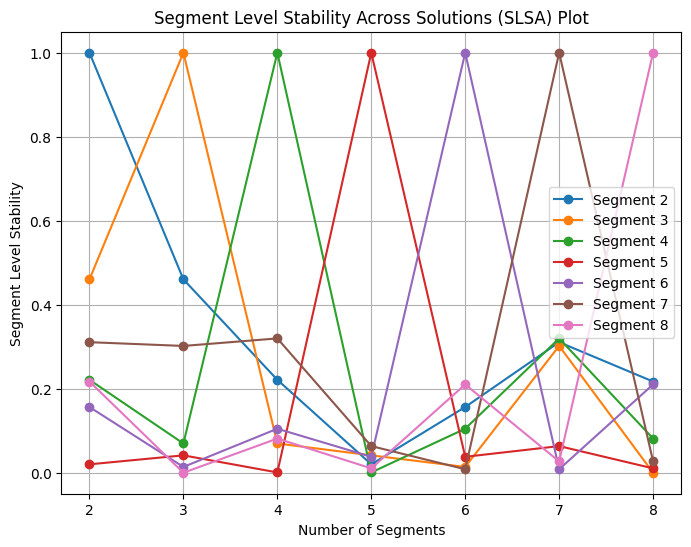

In [46]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

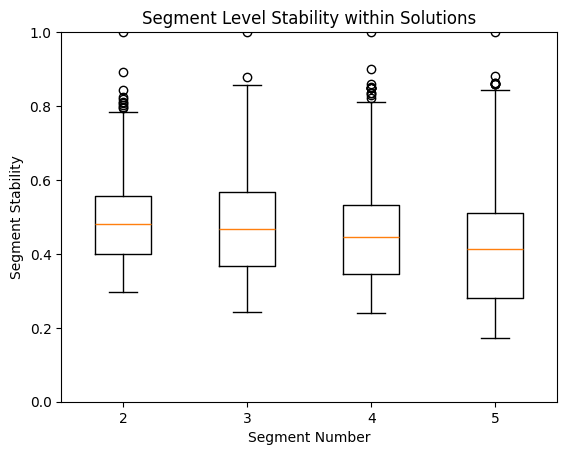

In [49]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [53]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


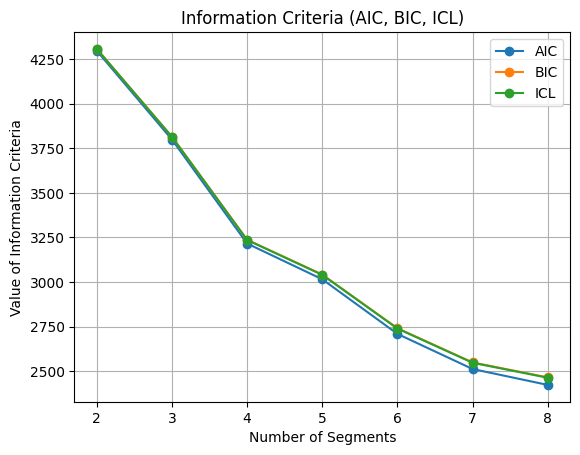

In [54]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [57]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [59]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807
